
# 🌼 자연어처리 기초 - 1차시(24.11.08)

---


## 1. 텍스트 전처리
1. 정규화 : 대소문자 통일, 용어 통일, 특수문자 제거, 정규표현식
2. 어간추출 / 표제어추출 : 단어에서 접사 제거하여 기본 형태 찾아내기, 사전에 기반하여 단어를 원형으로 변환하기
3. 불용어 제거 : 불용어 목록 정의하고 필터링
4. 토큰화 : 의미를 갖는 최소한의 단위로 나누기

In [1]:
text = 'Today is an exciting Friday'
lower_text = text.lower() # 소문자 변환
lower_text

'today is an exciting friday'

In [2]:
text2 = 'The weekend is short, only two days long.'
upper_text = text2.upper()
upper_text

'THE WEEKEND IS SHORT, ONLY TWO DAYS LONG.'

In [3]:
import re  # 정규표현식

text3 = '스마트폰은 핸드폰, 휴대폰 이라고도 할 수 있어요'
normalized = re.sub(r'(핸드폰|휴대폰)', '스마트폰', text3)
normalized

'스마트폰은 스마트폰, 스마트폰 이라고도 할 수 있어요'

|구성 요소|설명|예시|
|---|---|---|
|특수 문자|특정 패턴에 매칭하는 메타 문자|
|.	|임의의 한 문자와 매칭 (줄 바꿈 제외)|	a.b → "a와 b 사이에 아무 문자"|
|*	|앞에 있는 문자가 0번 이상 반복됨|	ab* → "a + 0개 이상의 b"|
|+	|앞에 있는 문자가 1번 이상 반복됨|	ab+ → "a + 1개 이상의 b"|
|?	|앞에 있는 문자가 0번 또는 1번 나타남|	ab? → "a + 0개 또는 1개의 b"|
|문자 클래스	|대괄호 안의 문자 중 하나와 매칭	|
|[abc]	|"a", "b", "c" 중 하나와 매칭	|[abc] → "a, b, 또는 c"|
|[a-z]	|소문자 알파벳 a부터 z까지의 문자 중 하나와 매칭	|[a-z] → "모든 소문자"|
|이스케이프 시퀀스	|특정 문자 그룹과 매칭	|
|\d|	숫자 (0-9)와 매칭	|\d+ → "1개 이상의 숫자"|
|\s	|공백 문자 (스페이스, 탭 등)와 매칭|	\s+ → "1개 이상의 공백"|
|\w	|알파벳, 숫자, 밑줄(_)과 매칭	|\w+ → "1개 이상의 단어 문자"|
|그룹화	|패턴을 그룹으로 묶어 매칭 및 캡처	|
|()	|괄호 안의 패턴을 그룹화하여 캡처 가능	|(\d{3})-(\d{4}) → 전화번호 패턴|

In [4]:
text4 = "안녕하세요!!! 오늘 점심은 무엇을 먹을까요? @김수빈 #Python #AI"
normalized2 = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text4)  # 대괄호 내부에 있는것을 제외하고 지워줘
normalized2

'안녕하세요 오늘 점심은 무엇을 먹을까요 김수빈 Python AI'

In [5]:
text5 = "문의는 soocong@chunjae.co.kr 으로 보내주세요. 더 많은 정보는 https://chatgpt.com/ 에서 확인하세요."
without_email = re.sub(r'\S+@\S+', '', text5)
without_email

'문의는  으로 보내주세요. 더 많은 정보는 https://chatgpt.com/ 에서 확인하세요.'

In [6]:
without_url = re.sub(r'http[s]?://\S+', '', without_email)
without_url

'문의는  으로 보내주세요. 더 많은 정보는  에서 확인하세요.'

In [7]:
# !pip install nltk

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import PorterStemmer  # 어간 추출
stemmer = PorterStemmer()
word = ['running', 'jumps', 'studies']

In [10]:
stems = []
for w in word:
    stems.append(stemmer.stem(w))

stems

['run', 'jump', 'studi']

In [11]:
from nltk.stem import WordNetLemmatizer  # 표제어 추출 (사전을 기반으로)
lemmatizer = WordNetLemmatizer()
words = ['running', 'jumps', 'studies']

In [12]:
lemmas = []
for word in words:
    lemma = lemmatizer.lemmatize(word, pos='v')  # pos 파라미터로 품사 지정 가능 v: 동사, n: 명사, r: 부사
    lemmas.append(lemma)

lemmas

['run', 'jump', 'study']

In [13]:
# pip install konlpy

In [14]:
from konlpy.tag import Okt

In [15]:
okt = Okt()
text = '달리고 있는 사람들을 보다'

In [16]:
stems = okt.morphs(text, stem=True)
stems

['달리', '고', '있다', '사람', '들', '을', '보다']

In [17]:
lemmas = []
for word, tag in okt.pos(text):
    lemmas.append((word, tag))

lemmas

[('달리', 'Noun'),
 ('고', 'Josa'),
 ('있는', 'Adjective'),
 ('사람', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('보다', 'Verb')]

In [18]:
# 불용어 제거
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
text = '이 문장에서 불용어라는 단어를 불용어로 처리합니다'
text.replace('불용어', '')  # 대량처리에 적합하지 않음

'이 문장에서 라는 단어를 로 처리합니다'

In [20]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [21]:
words = ['This', 'is', 'a', 'simple', 'example']
filtered = []

In [22]:
for word in words:
    if word.lower() not in stop_words:
        filtered.append(word)
    
filtered

['simple', 'example']

In [23]:
text = '불용어 예시를 실행해봅니다.'
stop_words = {'불', '를'}

In [24]:
words = okt.morphs(text)
filtered_ko = []

for word in words:
    if word not in stop_words:
        filtered_ko.append(word)

filtered_ko

['용어', '예시', '실행', '해봅니다', '.']

In [25]:
words = okt.morphs(text, stem=True)
words

['불', '용어', '예시', '를', '실행', '해보다', '.']

## 2-1. 토큰화 (영어)
1. word_tokenize
2. TfidfVectorizer

In [26]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RMARKET\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
nltk.__version__

'3.9.1'

In [28]:
# nltk.download()

In [29]:
from nltk.tokenize import word_tokenize
text = "It's difficult to create English sentence examples"

In [30]:
tokens = word_tokenize(text)
tokens

['It', "'s", 'difficult', 'to', 'create', 'English', 'sentence', 'examples']

## 2-2. 토큰화 (한국어)
1. okt
2. hannanum
3. kkma

In [31]:
# pip install konlpy

In [32]:
import konlpy
from konlpy.tag import Okt, Hannanum, Kkma 

In [33]:
okt = Okt() 
hannanum = Hannanum() 
kkma = Kkma() 

In [34]:
text = "아버지가방에들어가신다." 
text2 = "저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀인가"

In [35]:
print(f'okt 형태소 추출: {okt.morphs(text)}')
print(f'hannanum 형태소 추출: {hannanum.morphs(text)}')
print(f'kkma 형태소 추출: {kkma.morphs(text)}')

okt 형태소 추출: ['아버지', '가방', '에', '들어가신다', '.']
hannanum 형태소 추출: ['아버지가방에들어가', '이', '시ㄴ다', '.']
kkma 형태소 추출: ['아버지', '가방', '에', '들어가', '시', 'ㄴ다', '.']


In [36]:
print(f'okt 형태소 추출: {okt.morphs(text2)}')
print(f'hannanum 형태소 추출: {hannanum.morphs(text2)}')
print(f'kkma 형태소 추출: {kkma.morphs(text2)}')

okt 형태소 추출: ['저', '기', '저', '뜀틀', '이내', '가', '뛸', '뜀틀', '인가', '내', '가안', '뛸', '뜀틀', '인가']
hannanum 형태소 추출: ['저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀', '인가']
kkma 형태소 추출: ['저', '기저', '뜀틀', '이내', '가', '뛰', 'ㄹ', '뜀틀', '이', 'ㄴ가', '내가', '안', '뛰', 'ㄹ', '뜀틀', '이', 'ㄴ가']


In [37]:
print(f'okt 명사 추출: {okt.nouns(text)}')
print(f'hannanum 명사 추출: {hannanum.nouns(text)}')
print(f'kkma 명사 추출: {kkma.nouns(text)}')

okt 명사 추출: ['아버지', '가방']
hannanum 명사 추출: ['아버지가방에들어가']
kkma 명사 추출: ['아버지', '아버지가방', '가방']


In [38]:
print(f'okt 명사 추출: {okt.nouns(text2)}')
print(f'hannanum 명사 추출: {hannanum.nouns(text2)}')
print(f'kkma 명사 추출: {kkma.nouns(text2)}')

okt 명사 추출: ['뜀틀', '이내', '뜀틀', '가안', '뜀틀']
hannanum 명사 추출: ['저기저뜀틀이내가뛸뜀틀인가내가안뛸뜀틀']
kkma 명사 추출: ['뜀틀', '내가', '뜀틀이내', '기저', '이내']


### Mecab
- 형태소분석기 성능 중 가장 빠르고 성능이 좋은 편으로 유명한 한국어 자연어 처리 모델
- mecab-ko-dic : https://github.com/Pusnow/mecab-ko-dic-msvc/releases/tag/mecab-ko-dic-2.1.1-20180720-msvc
- mecab-ko-msvc :https://github.com/Pusnow/mecab-ko-msvc/releases/tag/release-0.9.2-msvc-3
- https://github.com/Pusnow/mecab-python-msvc/releases
- C드라이브 바로 아래에 mecab이라는 폴더 생성 후 mecab-ko-dic, mecab-ko-msvc 파일 언패킹
- 비트에 맞는 python wheel 설치 후 anaconda3 > envs > 가상환경 > Lib > site-packages 폴더로 이동
- python version 3.9인 가상환경 실행 (Anaconda Prompt)
- 실행 후 wheel을 설치한 경로로 이동하여 pip install mecab-python3 실행
- `커널 restart 후 코드 실행`


In [39]:
from konlpy.tag import Mecab

m = Mecab(dicpath = 'C:/mecab/mecab-ko-dic')
m.nouns('한국어자연어처리')

['한국어', '자연어', '처리']

In [40]:
m.morphs(text)

['아버지', '가', '방', '에', '들어가', '신다', '.']

In [41]:
m.nouns(text)

['아버지', '방']

In [42]:
m.morphs(text2)

['저기',
 '저',
 '뜀틀',
 '이',
 '내',
 '가',
 '뛸',
 '뜀틀',
 '인가',
 '내',
 '가',
 '안',
 '뛸',
 '뜀틀',
 '인가']

## 3. 텍스트 벡터화
1. Bag-of-Words
2. TF-IDF

In [43]:
def bag_or_words(text):
    okt = Okt()
    text = text.replace('.', '')
    tokens = okt.morphs(text)
    word_dict = {}
    bow= []
    
    for token in tokens:
        if token not in word_dict:
            word_dict[token] = len(word_dict)
            # 인덱스 부여
            bow.append(1)
        else:
            bow[word_dict[token]] += 1
        
    return word_dict, bow

In [44]:
doc = '반복되는 단어는 단어 개수만큼 추가됩니다.'
word_dict, bow = bag_or_words(doc)
print(bow)
print(word_dict)

[1, 1, 2, 1, 1, 1, 1, 1]
{'반복': 0, '되는': 1, '단어': 2, '는': 3, '개수': 4, '만큼': 5, '추가': 6, '됩니다': 7}


In [45]:
doc = '그룹 에스파 카리나가 미모를 뽐냈다. 카리나는 7일 자신의 인스타그램에 "우울할 땐 이 포즈를 해봐"라는 글과 사진을 게재했다.'
word_dict, bow = bag_or_words(doc)
print(bow)
print(word_dict)

[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{'그룹': 0, '에스': 1, '파': 2, '카리나': 3, '가': 4, '미모': 5, '를': 6, '뽐냈다': 7, '는': 8, '7일': 9, '자신': 10, '의': 11, '인스타그램': 12, '에': 13, '"': 14, '우울할': 15, '땐': 16, '이': 17, '포즈': 18, '해봐': 19, '라는': 20, '글': 21, '과': 22, '사진': 23, '을': 24, '게재': 25, '했다': 26}


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
corpus = ['반복되는 단어는 단어 개수만큼 추가됩니다.']
vector = CountVectorizer()
print(f'벡터화된 문장: {vector.fit_transform(corpus).toarray()}')
print(f'단어 사전: {vector.vocabulary_}') # 각 인덱스가 정렬된 상태로 나온다

벡터화된 문장: [[1 1 1 1 1]]
단어 사전: {'반복되는': 3, '단어는': 2, '단어': 1, '개수만큼': 0, '추가됩니다': 4}


In [86]:
text = ['BOW works the same for English']
vect = CountVectorizer(stop_words=['the', 'for'])
print(f'벡터화된 문장: {vect.fit_transform(text).toarray()}')
print(f'단어 사전: {vect.vocabulary_}')

벡터화된 문장: [[1 1 1 1]]
단어 사전: {'bow': 0, 'works': 3, 'same': 2, 'english': 1}


In [49]:
vect = CountVectorizer(stop_words='english')  # 자체 불용어 사전
print(f'벡터화된 문장: {vect.fit_transform(text).toarray()}')
print(f'단어 사전: {vect.vocabulary_}')

벡터화된 문장: [[1 1 1]]
단어 사전: {'bow': 0, 'works': 2, 'english': 1}


In [87]:
text = ['hello my name is hello are you happy?']
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 2 1 1 1 1]]
{'hello': 2, 'my': 4, 'name': 5, 'is': 3, 'are': 0, 'you': 6, 'happy': 1}


tf-idf

In [50]:
import pandas as pd
from math import log

# DTM: 문서 단어 행렬 (Document Term Matrix)

docs = [
  '원숭이 엉덩이는 빨개',
  '빨간건 사과',
  '사과는 맛있어',
  '맛있으면 바나나'
]


In [51]:
voca = []
for doc in docs:
    words = doc.split()
    for w in words:
        if w not in voca:
            voca.append(w)


voca.sort()
voca

['맛있어', '맛있으면', '바나나', '빨간건', '빨개', '사과', '사과는', '엉덩이는', '원숭이']

In [52]:
N = len(docs)
def tf(t, d):
    return d.count(t)
# TF: 특정 문서 d에서 특정 단어 t의 등장 횟수

In [53]:
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc  # True, False
    return log(N/(df+1))

In [54]:
def tfidf(t, d):
    return tf(t, d) * idf(t)

In [55]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]

    for j in range(len(voca)):
        t = voca[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=voca)
tf_

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0,0,0,0,1,0,0,1,1
1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,1,1,0,0
3,0,1,1,0,0,0,0,0,0


In [56]:
result2 = []
for i in range(len(voca)):
    t = voca[i]
    result2.append(idf(t))

In [57]:
idf_ = pd.DataFrame(result2, index=voca, columns=['IDF'])
idf_

,IDF
맛있어,0.693147
맛있으면,0.693147
바나나,0.693147
빨간건,0.693147
빨개,0.693147
사과,0.287682
사과는,0.693147
엉덩이는,0.693147
원숭이,0.693147


In [58]:
result3 = []
for i in range(N):
    result3.append([])
    d = docs[i]
    for j in range(len(voca)):
        t = voca[j]
        result3[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result3, columns=voca)
tfidf_

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147
1,0.000000,0.000000,0.000000,0.693147,0.000000,0.287682,0.000000,0.000000,0.000000
2,0.693147,0.000000,0.000000,0.000000,0.000000,0.287682,0.693147,0.000000,0.000000
3,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
# 사이킷런을 통한 TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
# 사실 이거 쓰면 짱빨리됨ㅎㅎ

docs = [
  '원숭이 엉덩이는 빨개',
  '빨간건 사과',
  '사과는 맛있어',
  '맛있으면 바나나'
]


In [60]:
vector = CountVectorizer()
vector.fit_transform(docs).toarray()
print(vector.vocabulary_)
print(vector.fit_transform(docs).toarray())

{'원숭이': 8, '엉덩이는': 7, '빨개': 4, '빨간건': 3, '사과': 5, '사과는': 6, '맛있어': 0, '맛있으면': 1, '바나나': 2}
[[0 0 0 0 1 0 0 1 1]
 [0 0 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0]]


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.57735027, 0.57735027],
       [0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.70710678, 0.        , 0.        , 0.        ],
       [0.70710678, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.70710678, 0.        , 0.        ],
       [0.        , 0.70710678, 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [62]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=voca)
df_tfidf

,맛있어,맛있으면,바나나,빨간건,빨개,사과,사과는,엉덩이는,원숭이
0,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.57735,0.57735
1,0.000000,0.000000,0.000000,0.707107,0.00000,0.707107,0.000000,0.00000,0.00000
2,0.707107,0.000000,0.000000,0.000000,0.00000,0.000000,0.707107,0.00000,0.00000
3,0.000000,0.707107,0.707107,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000


## 4. 텍스트 임베딩 (Word2Vec)
1. CBOW
2. Skip-gram

In [63]:
# 넘파이 지우기 pip uninstall numpy
# 넘파이 재설치하기 pip install numpy==1.24.4
# gensim 설치하기 pip install gensim==3.4.0
# scipy 지우기 pip uninstall scipy
# scipy 설치하기 pip install scipy==1.9.3

In [64]:
from gensim.models import Word2Vec

sentences = [
    ['the', 'cat', 'is', 'on', 'the', 'mat'],
    ['dogs', 'are', 'in', 'the', 'garden'],
    ['we', 'love', 'playing', 'with', 'our', 'pets']
]


In [65]:
# 다 설치하고 업데이트!!!
# !pip install --upgrade gensim

In [66]:
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)
cbow_model.wv.most_similar('cat')

[('with', 0.17826786637306213),
 ('pets', 0.16072483360767365),
 ('garden', 0.10560770332813263),
 ('on', 0.09215974807739258),
 ('is', 0.027008360251784325),
 ('we', 0.00773055013269186),
 ('the', -0.037719566375017166),
 ('are', -0.045522745698690414),
 ('dogs', -0.04649786278605461),
 ('mat', -0.05902623012661934)]

In [67]:
skip_gram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
skip_gram_model.wv.most_similar('cat')

[('with', 0.17826786637306213),
 ('pets', 0.16072483360767365),
 ('garden', 0.10560770332813263),
 ('on', 0.09215974807739258),
 ('is', 0.027008360251784325),
 ('we', 0.00773055013269186),
 ('the', -0.037719566375017166),
 ('are', -0.045522745698690414),
 ('dogs', -0.04649786278605461),
 ('mat', -0.05902623012661934)]


## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 음식점 리뷰 데이터를 다운로드받고 불러오세요!

In [68]:
# pip install kagglehub

In [69]:
# pip install kaggle

In [70]:
# 캐글에서 데이터 다운로드
import kagglehub
path = kagglehub.dataset_download("ninetyninenewton/kr3-korean-restaurant-reviews-with-ratings")

print("설치 파일 경로:", path)

설치 파일 경로: C:\Users\RMARKET\.cache\kagglehub\datasets\ninetyninenewton\kr3-korean-restaurant-reviews-with-ratings\versions\1


In [71]:
# 다운받은 경로에 접근하여 csv로 읽어오기
import pandas as pd
df = pd.read_csv('C:/Users/RMARKET/.cache/kagglehub/datasets/ninetyninenewton/kr3-korean-restaurant-reviews-with-ratings/versions/1/kr3.tsv', sep='\t', encoding='utf-8')
restaurants = df.sample(n=1000, random_state=42)
# 데이터가 너무 커요~ 랜덤으로 1000개정도만 가져와봅시다
restaurants

,Rating,Review
124388,1,삼겹만 먹다가 목살 먹었어요 냉면에 역시 저기압일 땐 고기 앞으로 가야쥬 잘 먹...
633594,2,가볼만해요 맛있더라고요
393430,0,새로 생겨서 가봤는데 생각보다는 별로였네요 라테 종류는 맛있었는데 아메리카노는 산...
547587,1,사람들이 너무 많아서 주변 분위기가 너무 시끄러웠다.. 이야기를 하기 위해서는 목청...
125026,1,밑에 뚜아앙 정신 차려라 세종에서 이 정도면 서비스 맛 다 좋은 편이다
...,...,...
216066,1,음료와 디저트가 좀 비싸고 카페 가는 길이 좀 힘들긴 해요 그래도 그게 잊힐 만큼 ...
166832,1,건강빵에 눈을 뜬 곳 건강빵도 맛있다는 걸 알게 됐어요 다른 빵보다 건강빵 등...
369894,1,600번째 리뷰는 늦었지만 화이트데이 기념으로 방문한 테이블 포포! Popo가 아니...
179061,0,양도 별로고 맛도 없고 원수 친구가 간다 해도 말릴 거 같아요. 그리고 컵이 약간 ...


Q2. 리뷰의 길이와 평점 사이의 관계를 분석해보세요

1. 각 리뷰의 문자 수나 단어 수를 계산해보세요.
2. 평점에 따른 리뷰의 평균 길이를 계산하여, 평점이 높은 리뷰와 평점이 낮은 리뷰의 길이 차이를 비교해보고 시각화해보세요

In [72]:
length = []

for r in restaurants['Review']:
    length.append(len(r))

avg = sum(length) / len(length)

print(f'리뷰 길이 평균은 {sum(length) / len(length)} 입니다.')

리뷰 길이 평균은 133.315 입니다.


In [73]:
short = []
long = []

for index, row in restaurants[['Rating', 'Review']].iterrows():
    rate = row['Rating']
    review = row['Review']
    
    if len(review) < avg:
        short.append(rate)
    else:
        long.append(rate)

print(f'짧은 리뷰 평균 평점: {sum(short)/len(short)}\n긴 리뷰 평점: {sum(long)/len(long)}')

짧은 리뷰 평균 평점: 1.2237960339943343
긴 리뷰 평점: 1.0952380952380953


In [74]:
short_score = {0:0, 1:0, 2:0}
long_score = {0:0, 1:0, 2:0}

for s in short:
    if s == 0:
        short_score[0] += 1
    elif s == 1:
        short_score[1] += 1
    elif s == 2:
        short_score[2] += 1
    else:
        print('뭔가 잘못됨')

for l in long:
    if l == 0:
        long_score[0] += 1
    elif l == 1:
        long_score[1] += 1
    elif l == 2:
        long_score[2] += 1
    else:
        print('뭔가 잘못됨')

print(f'짧은 리뷰: {short_score} \n긴 리뷰: {long_score}')

짧은 리뷰: {0: 65, 1: 418, 2: 223} 
긴 리뷰: {0: 35, 1: 196, 2: 63}


In [75]:
print(f'짧은 리뷰 0점 비율: {short_score[0]/len(short):.2f}, 1점 비율: {short_score[1]/len(short):.2f}, 2점 비울: {short_score[2]/len(short):.2f}')
print(f'긴 리뷰 0점 비율: {long_score[0]/len(long):.2f}, 1점 비율: {long_score[1]/len(long):.2f}, 2점 비율: {long_score[2]/len(long):.2f}')

짧은 리뷰 0점 비율: 0.09, 1점 비율: 0.59, 2점 비울: 0.32
긴 리뷰 0점 비율: 0.12, 1점 비율: 0.67, 2점 비율: 0.21


- 짧은 리뷰가 높은 점수를 더 잘 주는 경향이 있다

Q2. 평점에 따라 리뷰에서 자주 등장하는 단어를 분석해보세요

1. 리뷰데이터를 전처리하고 자유로운 방법으로 토큰화를 수행해보세요
2. 토큰화된 단어들의 빈도수를 계산하고 가장 많이 등장한 단어들을 bar그래프로 시각화해보세요

In [76]:
reviews = restaurants['Review']
nreviews = []

for r in reviews:
    nreviews.append(re.sub('[^가-힣a-zA-Z\s]', '', r))

nreviews

['삼겹만 먹다가 목살 먹었어요 냉면에   역시 저기압일 땐 고기 앞으로 가야쥬 잘 먹었습니다',
 '가볼만해요 맛있더라고요',
 '새로 생겨서 가봤는데 생각보다는 별로였네요  라테 종류는 맛있었는데 아메리카노는 산미가 강하기도 하고 맛이 좀 따로 노는 느낌이었습니다 아인슈페너는 예쁘고 크림도 맛있었는데 아무래도 너무 크림이 되직하다 보니 마시기에는 불편했고 좀 느끼해서 다 마시기도 힘들었어요 베이커리류는 가게 카운터 앞에 그냥 진열되어있는데 예쁘기는 해도 위생상 안 좋아 보였어요 초코쿠키는 만든 지 너무 오래된 것 같이 딱딱하고 약간 덜 익은 느낌이라 먹고 당황했네요 투명 케이스라도 덮어두면 더 나을 것 같네요 실내는 예쁘고 넓은데 그만큼 시끄럽고 또 음악소리도 너무 커서 오래 앉아있다는 힘들었습니다 전반적으로 외관에만 치중한 것 같아서 아쉬웠습니다',
 '사람들이 너무 많아서 주변 분위기가 너무 시끄러웠다 이야기를 하기 위해서는 목청을 높여야 했다 음식점 분위기는 별로',
 '밑에 뚜아앙 정신 차려라 세종에서 이 정도면 서비스 맛 다 좋은 편이다',
 '회기역 근처에 있는 족발보쌈 맛 집 시에 갔는데도 많은 손님들로 북적였다 족발보다는 보쌈이 유명하다 해서 보쌈 중 사이즈로 시켰다 고기는 평범한 거 같은데 보쌈김치와 그 위에 올려진 양념이 이 집의 점수인 듯 김치는 깍둑 썬 생고구마와 무를 돌돌 말은 형태로 나오는데 배로 만든 달달한 양념과 너무나도 잘 어우러진다 다른 테이블 여기저기서 보쌈김치 추가 주문이 계속 나온다 보쌈에서 김치의 중요성을 새삼 다시 느끼게 됐다',
 '치즈 성애자들 환장할만한 곳',
 '핵존맛탱집이에요  진짜 너무 맛있어요 여기서 먹고 다른 데서 곱창이나 막창 먹으면 맛이 좀 심심하게 느껴져요 추천합니다  가격이 좀만 쌌으면 하는 바람',
 '성북동에 위치한 알렉스 더 커피 랩 분점 건축사무소와 같이 운영되는 듯한 이 카페는 정원이 아름다운 곳이다 플랫 화이트를 먹고 싶었으나 메뉴에 없어 비슷하다고 추천받은 라테 와 아이스 아메리카노

In [77]:
with open('./data/stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords = file.read().split()

print(stopwords)

['가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과', '같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에', '이르다', '결국', '결론을', '낼', '수', '있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가', '있다', '관계없이', '관련이', '있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런', '까닭에', '그런데', '그런즉', '그럼', '그럼에도', '불구하고', '그렇게', '함으로써', '그렇지', '그렇지', '않다면', '그렇지', '않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에', '따르는', '그위에', '그저', '그중에서', '그치지', '않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지', '미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지', '않다', '놀라다', '누가', '알겠는가', '누구', '다른', '다른', '방면으로', '다만', '다섯', '다소', '다수', '다시', '말하자면', '다시말하면', '다음', '다음에', '다음으로', '단지', '답다', '당신', '당장', '대로', '하다', '대하면', '대하여', '대해', '말하자면', '대해서', '댕그', '더구나', '더군다나', '더라도', '더불어', '더욱더', '더욱이는', '도달하다', '도착하

In [78]:
review_token = []

for nr in nreviews:
    review_token.extend(okt.morphs(nr))

In [79]:
token_num = {}

for rt in review_token:
    if rt not in stopwords:
        if rt in token_num.keys():
            token_num[rt] += 1
        else:
            token_num[rt] = 1

In [80]:
sorted_token_num = dict(sorted(token_num.items(), key=lambda item: item[1], reverse=True))
top10 = dict(list(sorted_token_num.items())[:10])
top10

{'맛': 579,
 '집': 201,
 '가격': 157,
 '음식': 148,
 '메뉴': 146,
 '정말': 135,
 '더': 133,
 '분위기': 133,
 '있는': 130,
 '잘': 128}

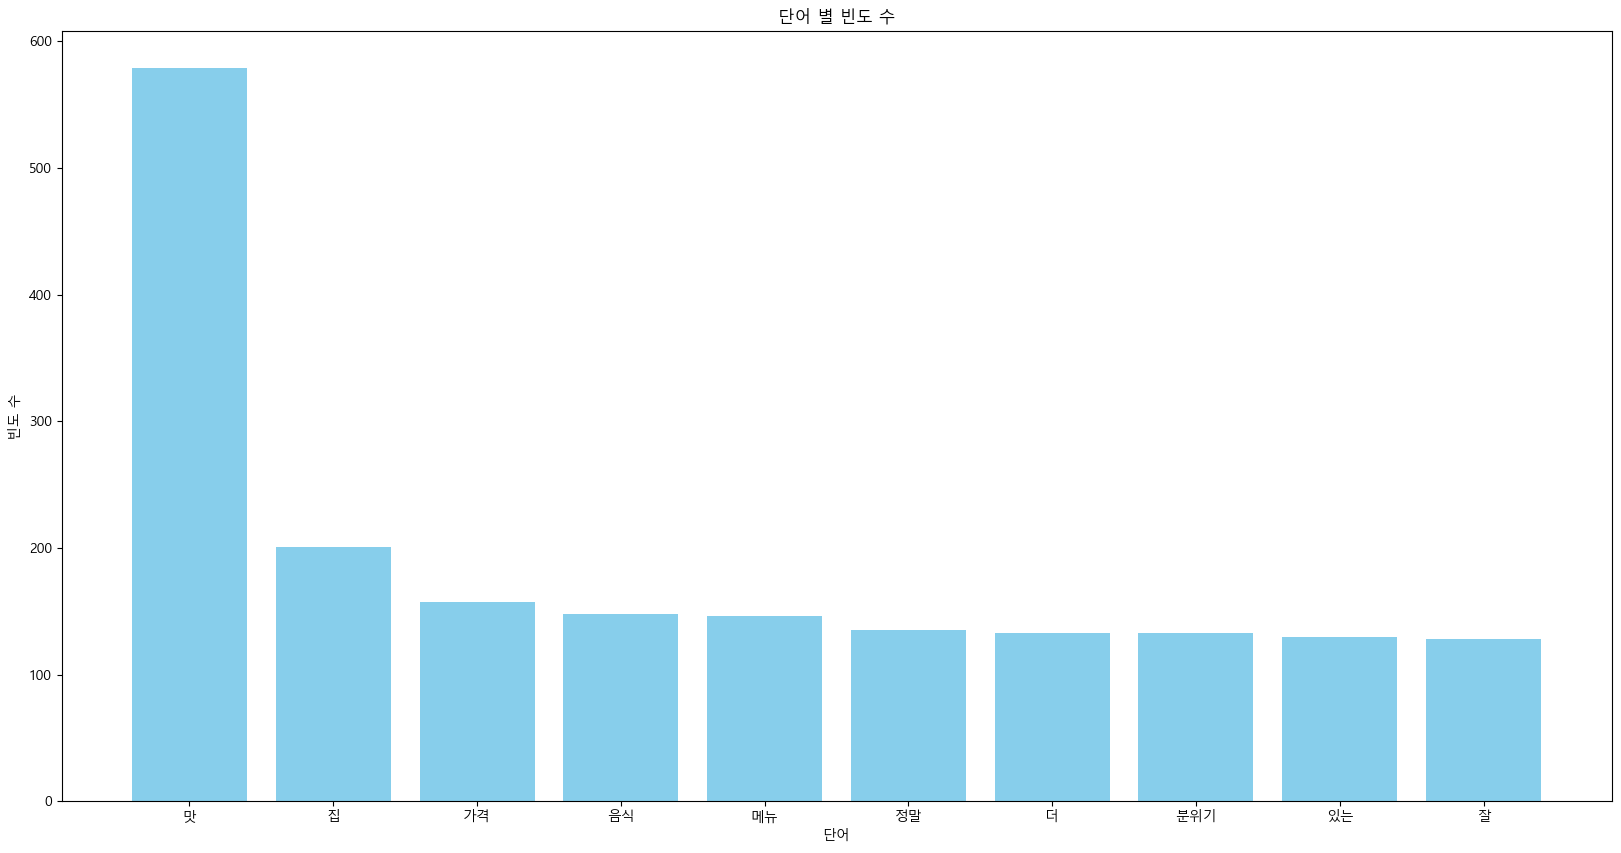

In [81]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20, 10))
plt.bar(top10.keys(), top10.values(), color='skyblue')
plt.title('단어 별 빈도 수')
plt.xlabel('단어')
plt.ylabel('빈도 수')
plt.show()